<a href="https://colab.research.google.com/github/alsrn36533/pdm02/blob/main/project/pdm02_prj01_mid_MLP_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDM: Project01
- ### data: sklearn이 제공하는 당뇨병 데이터  
- ### analysis:  Keras MLP Regression 


# pandas
## MLP
    * 당뇨병 데이터 MLP 회기 분석 모형

> [참고] https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [168]:
# import
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets

In [170]:
#
# pandas
#
########################################
# 당뇨병 데이터 구조 => DataFrame
# Attribute Information:
#     - age     age in years
#     - sex
#     - bmi     body mass index
#     - bp      average blood pressure
#     - s1      tc, T-Cells (a type of white blood cells)
#     - s2      ldl, low-density lipoproteins
#     - s3      hdl, high-density lipoproteins
#     - s4      tch, thyroid stimulating hormone
#     - s5      ltg, lamotrigine
#     - s6      glu, blood sugar level
# - target  a quantitative measure of disease progression one year after baseline
# [참고] https://wikidocs.net/49981
#       https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes
#
########################################
df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## Check data

In [172]:
# NaN, null
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [173]:
# Duplicates
df.duplicated().sum()

0

## target의 값을 결정하는 중요한 특징
- 양의 상관성: bmi, bp, s5
- 반상관성 : s3

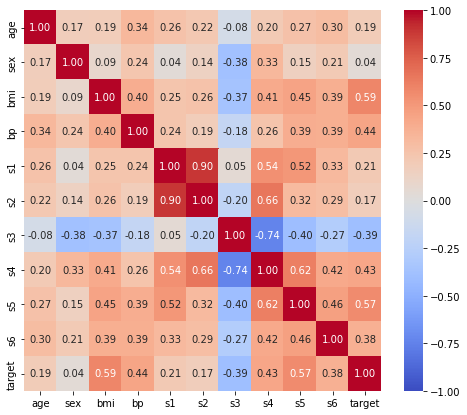

In [174]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()

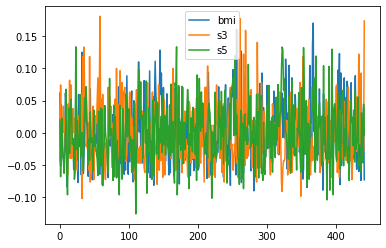

In [175]:
df[['bmi','bp','s3','s5']].plot()

<Figure size 576x576 with 0 Axes>

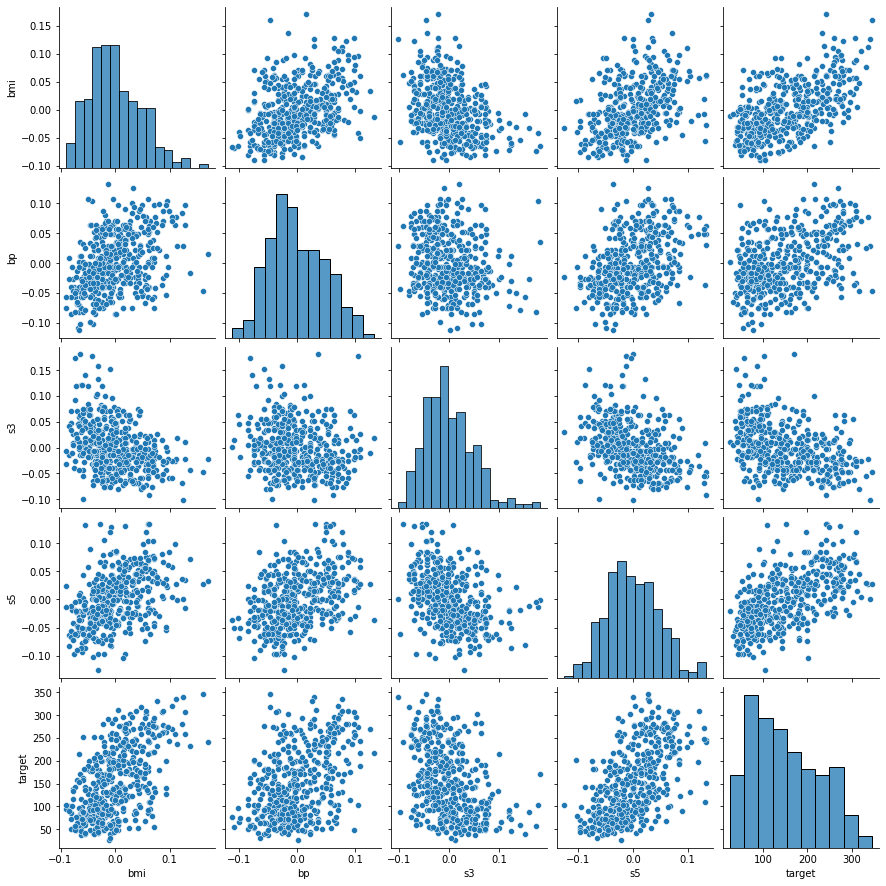

In [176]:
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi', 'bp', 's3','s5','target']])
plt.show()

---

## 데이터 구성
- train data
- test data


In [177]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [178]:
X = df[['bmi','bp', 's3','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)

((442, 3), (442, 1), numpy.ndarray, numpy.ndarray)

In [179]:
# target: 2d array => vector
y = np.squeeze(y, 1)
X.shape, y.shape

((442, 3), (442,))

In [180]:
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((353, 3), (89, 3), (353,), (89,))

## MLP model
- Sequential model
- Functional model

In [144]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

### Sequential model

In [37]:
# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (X_train.shape[1],), activation = 'relu'))  # X_train.shape[1]
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear') ) #, activation = 'sigmoid'))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
# model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
    
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                64        
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


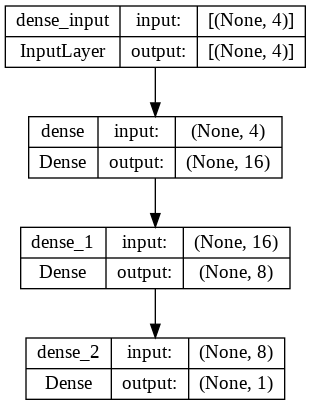

In [15]:
plot_model(model, show_shapes=True)

In [16]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31515.0645 - mse: 31515.0664 - val_loss: 22460.3672 - val_mse: 22460.3672 - 950ms/epoch - 33ms/step
Epoch 2/200
29/29 - 0s - loss: 31463.4824 - mse: 31463.4824 - val_loss: 22405.7949 - val_mse: 22405.7949 - 80ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31382.3047 - mse: 31382.3047 - val_loss: 22324.6504 - val_mse: 22324.6504 - 76ms/epoch - 3ms/step
Epoch 4/200
29/29 - 0s - loss: 31262.5469 - mse: 31262.5469 - val_loss: 22204.1836 - val_mse: 22204.1836 - 78ms/epoch - 3ms/step
Epoch 5/200
29/29 - 0s - loss: 31088.7793 - mse: 31088.7793 - val_loss: 22039.2539 - val_mse: 22039.2539 - 73ms/epoch - 3ms/step
Epoch 6/200
29/29 - 0s - loss: 30855.5078 - mse: 30855.5078 - val_loss: 21810.7715 - val_mse: 21810.7715 - 84ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 30536.1836 - mse: 30536.1836 - val_loss: 21511.2363 - val_mse: 21511.2363 - 77ms/epoch - 3ms/step
Epoch 8/200
29/29 - 0s - loss: 30121.6387 - mse: 30121.6387 - val_loss: 21126.2520 - val_mse: 2

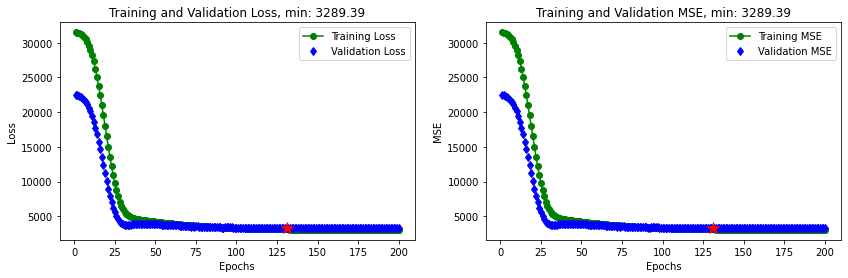

In [17]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [19]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2964.8804 - mse: 2964.8804 - 30ms/epoch - 3ms/step
테스트 세트의 MSE: 2964.88 


In [18]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()


9/9 [==============================] - 0s 2ms/step


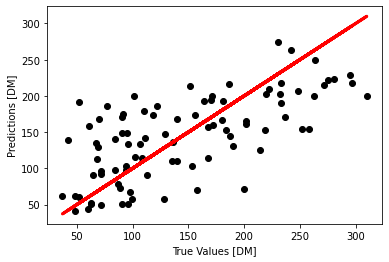

In [20]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [21]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2964.8804000314867
r2_score: 0.440393454026377


## Summary
### r2_score
1. loss='mse',  optimizer ='rmsprop'
    - 0.444 for X = df[['bmi', 'bp', 's3','s5']].values
    - 0.452 for X = df[['bmi', 'bp', 's4','s5']].values

2. loss='mse',  optimizer ='adam'
    - 0.441 for X = df[['bmi', 'bp', 's3','s5']].values
    - 0.459 for X = df[['bmi', 'bp', 's4','s5']].values
> 반상관 특징인 s3를 정상관 특징인 s4로 대체하면 회기 성능이 개선된다.

---

### [DIY] MLP Functional model을 구성해서 분석하시오.

In [145]:
# Functional model
from keras import layers, models

inputs = layers.Input(shape=(4,))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
output = Dense(1, activation='linear')(x)

model = models.Model(inputs=inputs, outputs=output)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )

model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_54 (Dense)            (None, 16)                80        
                                                                 
 dense_55 (Dense)            (None, 8)                 136       
                                                                 
 dense_56 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [182]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31491.6035 - mse: 31491.6035 - val_loss: 22429.3730 - val_mse: 22429.3730 - 1s/epoch - 38ms/step
Epoch 2/200
29/29 - 0s - loss: 31424.0469 - mse: 31424.0469 - val_loss: 22366.9570 - val_mse: 22366.9570 - 75ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31341.0312 - mse: 31341.0312 - val_loss: 22290.8125 - val_mse: 22290.8125 - 74ms/epoch - 3ms/step
Epoch 4/200
29/29 - 0s - loss: 31239.8008 - mse: 31239.8008 - val_loss: 22198.7793 - val_mse: 22198.7793 - 78ms/epoch - 3ms/step
Epoch 5/200
29/29 - 0s - loss: 31116.7598 - mse: 31116.7598 - val_loss: 22086.2051 - val_mse: 22086.2051 - 82ms/epoch - 3ms/step
Epoch 6/200
29/29 - 0s - loss: 30969.7344 - mse: 30969.7344 - val_loss: 21957.7773 - val_mse: 21957.7773 - 94ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 30799.7734 - mse: 30799.7734 - val_loss: 21804.8008 - val_mse: 21804.8008 - 80ms/epoch - 3ms/step
Epoch 8/200
29/29 - 0s - loss: 30601.6035 - mse: 30601.6035 - val_loss: 21627.1953 - val_mse: 2162

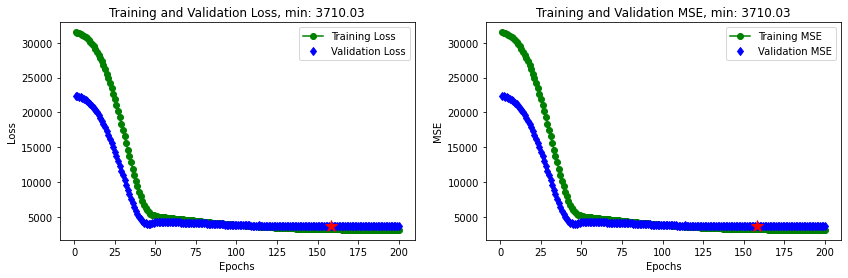

In [183]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [184]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2878.1140 - mse: 2878.1140 - 27ms/epoch - 3ms/step
테스트 세트의 MSE: 2878.11 


In [185]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()


9/9 [==============================] - 0s 2ms/step


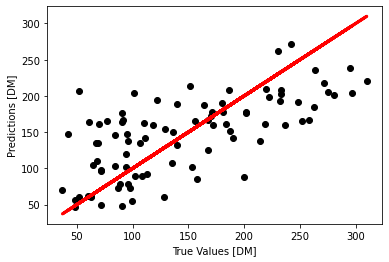

In [186]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [28]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2951.7410088102956
r2_score: 0.4428734492860201


---
[DIY] 도전해서 아래에 완성하시오.
---
## target의 값을 결정하는 중요한 특징을 변경
- 양의 상관성: bmi, bp, s5
- 반상관성 : s3

1. 양의 상관성 특징에서 bp를 제외하고 모델을 훈련
2. 양의 상관성 특징에 s4를 추가해서 모델을 훈련
3. optimizer 또는 activation 을 변경해서 모델 훈련
4. 위의 결과를 비교하는 결과 정리

### 양의 상관성 특징에서 bp를 제외하고 모델을 훈련

In [181]:
# Functional model
from keras import layers, models

inputs = layers.Input(shape=(3,))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
output = Dense(1, activation='linear')(x)

model = models.Model(inputs=inputs, outputs=output)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )

model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_69 (Dense)            (None, 16)                64        
                                                                 
 dense_70 (Dense)            (None, 8)                 136       
                                                                 
 dense_71 (Dense)            (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [188]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2878.1137475731507
r2_score: 0.4567702315474491


### 양의 상관성 특징에 s4를 추가해서 모델을 훈련

In [74]:
# Functional model
from keras import layers, models

inputs = layers.Input(shape=(5,))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
output = Dense(1, activation='linear')(x)

model = models.Model(inputs=inputs, outputs=output)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_18 (Dense)            (None, 16)                96        
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [83]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2963.763438229258
r2_score: 0.440604275055152


### 3. optimizer 또는 activation 을 변경해서 모델 훈련

In [123]:
# Functional model
from keras import layers, models

inputs = layers.Input(shape=(4,))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
output = Dense(1, activation='tanh')(x)

model = models.Model(inputs=inputs, outputs=output)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )

model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_48 (Dense)            (None, 16)                80        
                                                                 
 dense_49 (Dense)            (None, 8)                 136       
                                                                 
 dense_50 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [129]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 26258.03370786517
r2_score: -3.9560742980261


### optimizer 또는 activation 을 변경해서 모델 훈련

- relu

In [151]:
# Functional model
from keras import layers, models

inputs = layers.Input(shape=(4,))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
output = Dense(1, activation='relu')(x)

model = models.Model(inputs=inputs, outputs=output)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )

model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_57 (Dense)            (None, 16)                80        
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dense_59 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [157]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2949.362390983126
r2_score: 0.44332240166414627


- sigmoid

In [160]:
# Functional model
from keras import layers, models

inputs = layers.Input(shape=(4,))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=inputs, outputs=output)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )

model.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_63 (Dense)            (None, 16)                80        
                                                                 
 dense_64 (Dense)            (None, 8)                 136       
                                                                 
 dense_65 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [166]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 26258.03370786517
r2_score: -3.9560742980261


### 위의 결과를 비교하는 결과 정리
양의 상관성 특징에서 bp를 제외하고 모델을 훈련했을때 는 값이 0.4567~ 으로 나왔고 s4를 추가해서 모델을 훈련 할때는 0.4406~ 으로 나왔습니다. 훈련모델이 적을수록 값이 높아지고 훈련 모델이 더해지면 값이 적어지는 결과가 나왔습니다.
3번지문에서 activation에서 relu와 sigmoid 두개를 훈련해봤을때 relu의 결과는 결과가 안정적인 수치로 나온 반면 sigmoid로 훈련했을때는 결과값이 불안정하게 나오는 결과가 있었습니다.이훈련모델에서는 sigmoid보다 relu가 더 알맞는 것 같습니다.